# IN CASE YOU WANT TO GO DIRECTLY TO THE ANSWERS OF THE QUESTIONS, PLEASE NOTE THAT THEY ARE AT THE END OF THE NOTEBOOK

# Predicting a Pandemic

### This challenge asks you to take a dataset related to the recent covid epidemic to determine based on a certain set of features if a patient has coronvarius or not. 

### If you have previous experience with exploring datasets in python you may find this easier. For those without experience the notebook is made in a way to walk you through the process. If you get stuck along the way and would like a hint you can reach out to amanda_house@mcafee.com. However, for each hint provided 10 points will be deducted from your final score for this challenge. This is to encourage employees to use google and other resources to find answers. 

### If you notice any errors please reach out to amanda_house@mcafee.com.

#### All of the necessary packages are imported in this notebook. If they fail to import you will need to pip install the package on your machine.

In [255]:
import pandas as pd
import numpy as np
import sklearn as sk

#The below imports are examples from sklearn. You may need to import more models as you go along. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### The first step you will need to complete is reading in the csv of data provided. You can do this using pandas read_csv() function. 

In [256]:
#add code to read in csv here
path_file= 'C:/Users/falvarez/Desktop/Hachathon/Predicting a Pandemic/Covid_Diagnosis.csv'
covid_dataframe=pd.read_csv(path_file, sep=',')

In [257]:
#The below function will print the first 5 rows of your dataframe. Note if your dataframe name is different you will need to change that. Here the dataframe is named covid_dataframe.
covid_dataframe.head()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
0,44477f75e8169d2,13,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,f,f,f,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
#It can be hard to see all of the columns in the above format. The code below creates a list 
#of all of the columns so you can view them easily.
covid_dataframe.columns.values.tolist()

['patient_id',
 'patient_age_quantile',
 'sars_cov_2_exam_result',
 'patient_addmited_to_regular_ward_1_yes_0_no',
 'patient_addmited_to_semi_intensive_unit_1_yes_0_no',
 'patient_addmited_to_intensive_care_unit_1_yes_0_no',
 'hematocrit',
 'hemoglobin',
 'platelets',
 'mean_platelet_volume',
 'red_blood_cells',
 'lymphocytes',
 'mean_corpuscular_hemoglobin_concentration_mchc',
 'leukocytes',
 'basophils',
 'mean_corpuscular_hemoglobin_mch',
 'eosinophils',
 'mean_corpuscular_volume_mcv',
 'monocytes',
 'red_blood_cell_distribution_width_rdw',
 'serum_glucose',
 'respiratory_syncytial_virus',
 'influenza_a',
 'influenza_b',
 'parainfluenza_1',
 'coronavirusnl63',
 'rhinovirus_enterovirus',
 'mycoplasma_pneumoniae',
 'coronavirus_hku1',
 'parainfluenza_3',
 'chlamydophila_pneumoniae',
 'adenovirus',
 'parainfluenza_4',
 'coronavirus229e',
 'coronavirusoc43',
 'inf_a_h1n1_2009',
 'bordetella_pertussis',
 'metapneumovirus',
 'parainfluenza_2',
 'neutrophils',
 'urea',
 'proteina_c_reativa

#### Now we know what our dataset looks like. Now what data type is each feature (int, object, float)? There is a pandas function that allows you to figure this out. 

In [259]:
#Code to display data types for each column
covid_dataframe.dtypes

patient_id                                             object
patient_age_quantile                                    int64
sars_cov_2_exam_result                                 object
patient_addmited_to_regular_ward_1_yes_0_no            object
patient_addmited_to_semi_intensive_unit_1_yes_0_no     object
                                                       ...   
hco3_arterial_blood_gas_analysis                      float64
po2_arterial_blood_gas_analysis                       float64
arteiral_fio2                                         float64
phosphor                                              float64
cto2_arterial_blood_gas_analysis                      float64
Length: 111, dtype: object

#### The next thing you need to do is clean the data. If you look at the dataframe above you will notice a few issues. 
#### 1. There is missing data listed as NaN. We need to figure out the best way to handle this. To make this solution standardized replace NaN with 0.
#### 2. We have categroical variables that would be easier to work with if they were numerical. There are many technicques you could use to handle this.


### 1. Missing Values

In [260]:
missing_values=covid_dataframe.isnull().sum()
missing_values_percentage=covid_dataframe.isnull().sum()/covid_dataframe.isnull().count()
table_missing_values=pd.concat([missing_values, missing_values_percentage], axis=1, keys=['total', 'percentage']).sort_values(by='total', ascending=False)
table_missing_values.head(10)

,total,percentage
urine_sugar,5644,1.000000
mycoplasma_pneumoniae,5644,1.000000
partial_thromboplastin_time_ptt,5644,1.000000
prothrombin_time_pt_activity,5644,1.000000
d_dimer,5644,1.000000
fio2_venous_blood_gas_analysis,5643,0.999823
urine_nitrite,5643,0.999823
vitamin_b12,5641,0.999468
lipase_dosage,5636,0.998583
albumin,5631,0.997697


In [261]:
#code to fill NaNs with 0
covid_dataframe=covid_dataframe.fillna(0)

#### After filling in the missing data the NaNs should now be displayed as 0 when you print the dataframe.

In [262]:
#Add code to view dataframe. Hint it is already in this notebook above. 
covid_dataframe.head()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
0,44477f75e8169d2,13,negative,f,f,f,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,126e9dd13932f68,17,negative,f,f,f,0.236515,-0.02234,-0.517413,0.010677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a46b4402a0e5696,8,negative,f,f,f,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,f7d619a94f97c45,5,negative,f,f,f,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,d9e41465789c2b5,15,negative,f,f,f,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Now above you might have noticed that we have data types listed as objects. We will consider these are categorical variables. What are all of these categorical features? The code below will display a dataframe of all these categorical features. 

In [263]:
covid_dataframe.select_dtypes(include=['object'])

,patient_id,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,respiratory_syncytial_virus,influenza_a,influenza_b,parainfluenza_1,coronavirusnl63,...,urine_ketone_bodies,urine_nitrite,urine_urobilinogen,urine_protein,urine_leukocytes,urine_crystals,urine_hyaline_cylinders,urine_granular_cylinders,urine_yeasts,urine_color
0,44477f75e8169d2,negative,f,f,f,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,126e9dd13932f68,negative,f,f,f,not_detected,not_detected,not_detected,not_detected,not_detected,...,0,0,0,0,0,0,0,0,0,0
2,a46b4402a0e5696,negative,f,f,f,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,f7d619a94f97c45,negative,f,f,f,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,d9e41465789c2b5,negative,f,f,f,not_detected,not_detected,not_detected,not_detected,not_detected,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,positive,f,f,f,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5640,517c2834024f3ea,negative,f,f,f,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5641,5c57d6037fe266d,negative,f,f,f,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5642,c20c44766f28291,negative,f,f,f,0,0,0,0,0,...,absent,0,normal,absent,29000,Ausentes,absent,absent,absent,yellow


#### We still need to handle any categorical variables. 

In [264]:
# Create a new dataframe that stores the dataframe of only categorical features above
covid_dataframe_categorical=covid_dataframe.select_dtypes(include=['object'])
covid_dataframe_categorical.columns

Index(['patient_id', 'sars_cov_2_exam_result',
       'patient_addmited_to_regular_ward_1_yes_0_no',
       'patient_addmited_to_semi_intensive_unit_1_yes_0_no',
       'patient_addmited_to_intensive_care_unit_1_yes_0_no',
       'respiratory_syncytial_virus', 'influenza_a', 'influenza_b',
       'parainfluenza_1', 'coronavirusnl63', 'rhinovirus_enterovirus',
       'coronavirus_hku1', 'parainfluenza_3', 'chlamydophila_pneumoniae',
       'adenovirus', 'parainfluenza_4', 'coronavirus229e', 'coronavirusoc43',
       'inf_a_h1n1_2009', 'bordetella_pertussis', 'metapneumovirus',
       'parainfluenza_2', 'influenza_b_rapid_test', 'influenza_a_rapid_test',
       'strepto_a', 'myeloblasts', 'urine_esterase', 'urine_aspect',
       'urine_ph', 'urine_hemoglobin', 'urine_bile_pigments',
       'urine_ketone_bodies', 'urine_nitrite', 'urine_urobilinogen',
       'urine_protein', 'urine_leukocytes', 'urine_crystals',
       'urine_hyaline_cylinders', 'urine_granular_cylinders', 'urine_yeasts',

#### Now we need to convert the categorical features into numerical features. One way to do this is using the code below. Sars_cov_2_exam_result is our target vairable so I have already converted that for you. You could also use other techniques like one hot encoding. Should patient_id be converted to a numerical value? What would happen if you did that? Would it help?

In [265]:
covid_dataframe['sars_cov_2_exam_result'] = covid_dataframe['sars_cov_2_exam_result'].astype('category').cat.codes

In [266]:
#add code to convert categorical features to numerical features. Note: it might be easier to create a 
#list of the columns and loop through them to save time.

for column in covid_dataframe_categorical.columns:
    covid_dataframe[column] = covid_dataframe[column].astype('category').cat.codes


In [267]:
covid_dataframe.head()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
0,1588,13,0,0,0,0,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,451,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3669,8,0,0,0,0,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5457,5,0,0,0,0,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4843,15,0,0,0,0,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Pandas has a lot of visualizations avaliable to explore our data. Below is an example of a histogram for our target variable. It is good to look at distributions for all of the features within your data before building your machine learning model. You will want to know if you have normal, uniform, or other types of distributions. 

#### I check the distributions for some features of the data set.

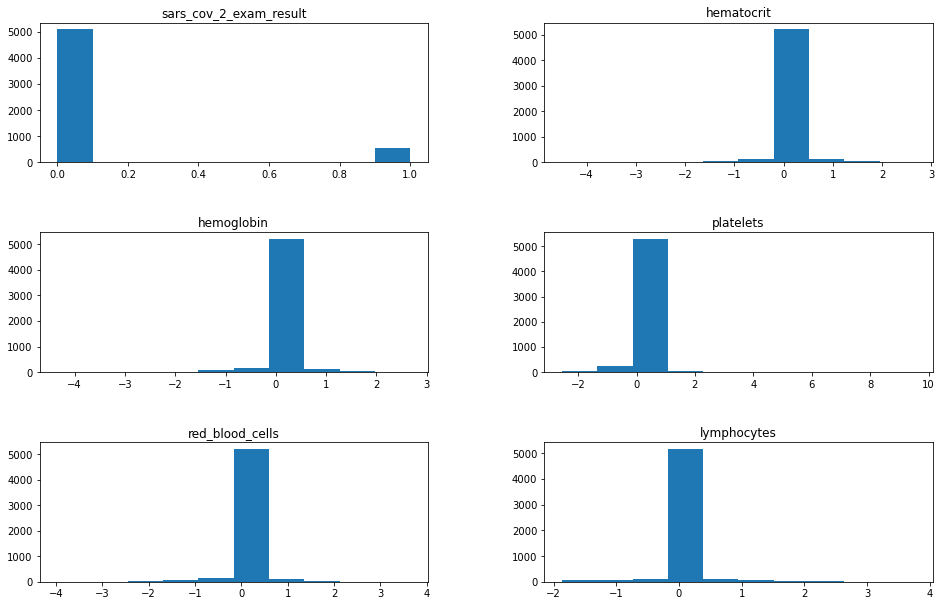

In [268]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

fig = plt.figure()
fig.set_figheight(45)
fig.set_figwidth(16)

fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax = fig.add_subplot(12, 2, 1)
plt.hist(covid_dataframe['sars_cov_2_exam_result'])
ax.set_title("sars_cov_2_exam_result")

ax = fig.add_subplot(12, 2, 2)
plt.hist(covid_dataframe['hematocrit'])
ax.set_title("hematocrit")

ax = fig.add_subplot(12, 2, 3)
plt.hist(covid_dataframe['hemoglobin'])
ax.set_title("hemoglobin")

ax = fig.add_subplot(12, 2, 4)
plt.hist(covid_dataframe['platelets'])
ax.set_title("platelets")

ax = fig.add_subplot(12, 2, 5)
plt.hist(covid_dataframe['red_blood_cells'])
ax.set_title("red_blood_cells")

ax = fig.add_subplot(12, 2, 6)
plt.hist(covid_dataframe['lymphocytes'])
ax.set_title("lymphocytes")

plt.show()

#### Another important part of exploring your data is summary statistics. Pandas has a nice function that allows you to print the summary statistics for your entire dataframe.

In [269]:
#Add code to display summary statistics
covid_dataframe.describe()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,...,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03
mean,2821.500000,9.318391,0.098866,0.013997,0.008859,0.007264,-2.336995e-10,-1.707654e-09,-4.075124e-11,7.826010e-10,...,-8.858965e-13,4.004252e-11,-8.150248e-12,1.594614e-12,-3.561304e-11,2.870305e-11,-1.187101e-10,1.647768e-11,2.214741e-11,2.480510e-11
std,1629.426791,5.777903,0.298509,0.117489,0.093713,0.084929,3.268915e-01,3.268915e-01,3.266203e-01,3.258055e-01,...,6.917145e-02,6.917145e-02,6.917145e-02,6.917145e-02,6.917145e-02,6.917145e-02,6.917145e-02,5.953330e-02,5.953330e-02,6.917145e-02
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,1410.750000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2821.500000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4232.250000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5643.000000,19.000000,1.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


#### It can also be important to look at the relationship between variables. If two variables are highly correlated it may be best to remove one. Below is an example of a scatterplot between two variables. 

#### I create the confussion matrix to see the correlation of some features of the data set

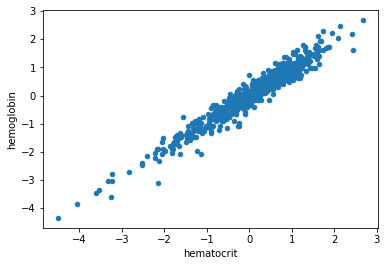

In [270]:
covid_dataframe.plot.scatter(x='hematocrit', y='hemoglobin')

### Before to split the data,  I am going to see the correlation of the varialbes with the target variable and in case they are not correlated, they will be deleted from the data frame.
### Moreover, in case there are variables that are correlated between them, I will keep just one of this variables in order to avoid multicollinearity

In [271]:
correlation_table=covid_dataframe.corr().loc[:,'sars_cov_2_exam_result']
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(correlation_table.sort_values(ascending=False))

sars_cov_2_exam_result                                1.000000e+00
patient_addmited_to_regular_ward_1_yes_0_no           1.424375e-01
patient_age_quantile                                  7.524442e-02
monocytes                                             7.443121e-02
red_blood_cells                                       4.576615e-02
mean_platelet_volume                                  4.062155e-02
hemoglobin                                            3.953027e-02
aspartate_transaminase                                3.874134e-02
hematocrit                                            3.739641e-02
ph_arterial_blood_gas_analysis                        3.645055e-02
po2_arterial_blood_gas_analysis                       3.618625e-02
cto2_arterial_blood_gas_analysis                      3.096676e-02
alanine_transaminase                                  2.904678e-02
gamma_glutamyltransferase                             2.894489e-02
urine_esterase                                        2.806637

### Variables which are correlated with the target variable:
### My criteria is to mantian the features above 0.02 value.
Therefore, I am going to mantain just these variables, the rest of them will be deleted as the correlation with the target variable is quite low.

In [272]:
correlation_table_sorted=correlation_table[(correlation_table.sort_values(ascending=False))>0.02]
correlation_table_sorted.head(50)

patient_age_quantile                                  0.075244
sars_cov_2_exam_result                                1.000000
patient_addmited_to_regular_ward_1_yes_0_no           0.142437
patient_addmited_to_intensive_care_unit_1_yes_0_no    0.027586
hematocrit                                            0.037396
hemoglobin                                            0.039530
mean_platelet_volume                                  0.040622
red_blood_cells                                       0.045766
monocytes                                             0.074431
proteina_c_reativa_mg_dl                              0.024927
creatinine                                            0.026500
alanine_transaminase                                  0.029047
aspartate_transaminase                                0.038741
gamma_glutamyltransferase                             0.028945
segmented                                             0.023767
urine_esterase                                        0

And the variables which I am going to delete are:

In [273]:
variables_to_delete_1=correlation_table[(correlation_table.sort_values(ascending=False))<0.02]
variables_to_delete_1

patient_id                                           -0.018664
patient_addmited_to_semi_intensive_unit_1_yes_0_no    0.019364
platelets                                            -0.106482
lymphocytes                                          -0.005749
mean_corpuscular_hemoglobin_concentration_mchc        0.017285
                                                        ...   
base_excess_arterial_blood_gas_analysis               0.015111
total_co2_arterial_blood_gas_analysis                -0.028879
hco3_arterial_blood_gas_analysis                     -0.024761
arteiral_fio2                                        -0.030815
phosphor                                             -0.005315
Name: sars_cov_2_exam_result, Length: 77, dtype: float64

In [274]:
variables_to_delete_2=correlation_table[(correlation_table.sort_values(ascending=False))>-0.02]
variables_to_delete_2

patient_id                                           -0.018664
patient_age_quantile                                  0.075244
sars_cov_2_exam_result                                1.000000
patient_addmited_to_regular_ward_1_yes_0_no           0.142437
patient_addmited_to_semi_intensive_unit_1_yes_0_no    0.019364
                                                        ...   
base_excess_arterial_blood_gas_analysis               0.015111
ph_arterial_blood_gas_analysis                        0.036451
po2_arterial_blood_gas_analysis                       0.036186
phosphor                                             -0.005315
cto2_arterial_blood_gas_analysis                      0.030967
Name: sars_cov_2_exam_result, Length: 70, dtype: float64

In [275]:
variables_to_delete=pd.Series(list(set(variables_to_delete_1).intersection(set(variables_to_delete_2))))
variables_to_delete.sort_values(ascending=False).values.tolist()

[0.019363681869438546,
 0.018949547933171246,
 0.018895829043760307,
 0.017284798674672856,
 0.016280872201310945,
 0.016171322564825633,
 0.015189328237885437,
 0.015189148939896391,
 0.015110811284055592,
 0.014515889826457129,
 0.013792546261340856,
 0.012062281722504432,
 0.011720848348731173,
 0.011303916423126488,
 0.010899994251738949,
 0.010074286161675525,
 0.0072599608653967805,
 0.0009800339389854692,
 0.0004810775362317287,
 1.5273059752952905e-10,
 9.171149782989011e-11,
 -0.001436311405946857,
 -0.002694784285026593,
 -0.004159194718700157,
 -0.004409343129761009,
 -0.004425545163715008,
 -0.005314858441154113,
 -0.005748779527187775,
 -0.007760478477945061,
 -0.008156810191160808,
 -0.009072977579501313,
 -0.009191313199626981,
 -0.009500270167219261,
 -0.009574864406540765,
 -0.010743688694435252,
 -0.012876097523174436,
 -0.01355240392464302,
 -0.013557364996609353,
 -0.014024901149189339,
 -0.015034900017181527,
 -0.017776002567894578,
 -0.018663679606813848]

In [276]:
#But I am going to get the indexes as it is the value necessary to use it in the drop function
variables_to_delete=pd.Series(list(set(variables_to_delete_1.index).intersection(set(variables_to_delete_2.index))))
variables_to_delete

0                         po2_venous_blood_gas_analysis
1                    international_normalized_ratio_inr
2                                           myeloblasts
3                 red_blood_cell_distribution_width_rdw
4                                  alkaline_phosphatase
5     patient_addmited_to_semi_intensive_unit_1_yes_...
6                                 urine_red_blood_cells
7                                      direct_bilirubin
8                                               albumin
9                                   urine_ketone_bodies
10              base_excess_arterial_blood_gas_analysis
11                           creatine_phosphokinase_cpk
12                                             ferritin
13                                             urine_ph
14                                        serum_glucose
15                                                 rods
16                      mean_corpuscular_hemoglobin_mch
17                                       metamye

### Deleting features that are not correlated with the target variable

In [277]:
covid_dataframe_new=covid_dataframe.drop(variables_to_delete, axis = 1, inplace=False)

In [278]:
covid_dataframe_new

,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,leukocytes,...,lactic_dehydrogenase,prothrombin_time_pt_activity,d_dimer,pco2_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,cto2_arterial_blood_gas_analysis
0,13,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,-0.094610,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5640,17,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5641,4,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5642,10,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### While there are still topics we haven't explored like feature reduction to keep this simple we will move on to building machine learning models using scikit learn. Note you may be able to improve your models performance by using feature reduction or exploring the dataset further. 

#### We have already discussed that sars_cov_2_exam_result is our target variable. We need to create a dataframe for our traget variable and a dataframe of features we will use in our model to predict the target. Note you will need to drop the target vvariable and patient_id from your features dataframe. Why patient_id? Well as we saw above it is very specific to each patient and would therefore not provide value to our model or result in incorrect predictions. 

In [279]:
#Before to start, I am going to move the sars_cov_2_exam_result to the first postion in the table.
first_col=covid_dataframe_new.pop("sars_cov_2_exam_result")
covid_dataframe_new.insert(0, "sars_cov_2_exam_result", first_col)
covid_dataframe_new.head()

,sars_cov_2_exam_result,patient_age_quantile,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,leukocytes,...,lactic_dehydrogenase,prothrombin_time_pt_activity,d_dimer,pco2_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,cto2_arterial_blood_gas_analysis
0,0,13,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,17,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,-0.09461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,8,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,5,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,15,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [280]:
#Add code to create your target dataframe
covid_dataframe_X=covid_dataframe_new[covid_dataframe_new.columns[1:]]

In [281]:
#Add code to create your features dataframe
covid_dataframe_Y=covid_dataframe_new[covid_dataframe_new.columns[:1]]

#### Now we have our target and features dataframes. Next we will need to split these into training and test sets. Wait, don't forget about your validation set. It is very important to also have a validation set to verify you didn't overfit your model. Below is an example of a train and test split. Note it is suggested you use 60% train, 20% test, and 20% validation.

In [282]:
#Using the train test split above figure out how you can also add a validation set. 
X_train,X_test=train_test_split(covid_dataframe_X, test_size=0.3, random_state=1)
#X_train,X_val=train_test_split(X_train, test_size=0.2, random_state=1)
Y_train,Y_test=train_test_split(covid_dataframe_Y, test_size=0.3, random_state=1)
#Y_train,Y_val=train_test_split(Y_train, test_size=0.2, random_state=1)

#### Finally, the part you have been waiting for, building machine learning models. Below is a simple example of a Linear Regression model fit to our data. Sklearn has a score feature which for this model displays the R-Squared. Does this R-Squared look good? Maybe we should try other techniques to improve it. For example no parameter tunning was done. What happens if you experiment with this? 

In [283]:
LR = LinearRegression()
LR.fit(X_train, Y_train)
abs(LR.score(X_test, Y_test))

0.05367870545606612

#### So far we have only tried Linear Regression. Maybe you think it is performing well. This means you can stop, right? No, it is best to run at least 3 other models to compare your model to. There are many to choose from Random Forest, SVM, Logistic Regression, KNN, Nueral Networks just to name a few. 

In [284]:
#KNeighbors Classifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train['sars_cov_2_exam_result'])
#Eiqui predicimos os valores de Y
knn_pred=knn.predict(X_test)

In [285]:
#KNeighbors Classifier - Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
#Eiqui enfrentamos os valores de Y predecidos, cos valores de Y reales (test_Y)
knn_rsquared=r2_score(Y_test, knn_pred)
print('The R_Squared of the K nearest neighbors is', knn_rsquared)
#Conclusion:
#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) as
#it is hapenning in this case
knn_accuracy=accuracy_score(Y_test,knn_pred)
print('The accuracy of the K nearest neighbors is', knn_accuracy)

knn_f1score=f1_score(Y_test,knn_pred)
print('The F1_Score of the K nearest neighbors is', knn_f1score)

knn_recallscore=recall_score(Y_test,knn_pred)
print('The Recall of the K nearest neighbors is', knn_recallscore)

knn_precision=precision_score(Y_test,knn_pred)
print('The precision of the K nearest neighbors is', knn_precision)

knn_rmse=mean_squared_error(Y_test, knn_pred)
print('The rmse of the K nearest neighbors is', knn_rmse)

The R_Squared of the K nearest neighbors is -0.20058676160337563
The accuracy of the K nearest neighbors is 0.898465171192444
The F1_Score of the K nearest neighbors is 0.05494505494505495
The Recall of the K nearest neighbors is 0.03164556962025317
The precision of the K nearest neighbors is 0.20833333333333334
The rmse of the K nearest neighbors is 0.10153482880755609


In [286]:
! pip install mlxtend  

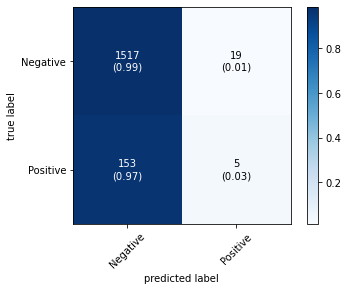

In [287]:
#KNeighbors Classifier -Confussion Matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

confusion_matrix_SVC= confusion_matrix(Y_test, knn_pred)
confusion_matrix_SVC_table= plot_confusion_matrix(confusion_matrix_SVC,
                                                   colorbar=True,
                                                   show_absolute= True,
                                                   show_normed= True,
                                                  class_names=['Negative', 'Positive'])

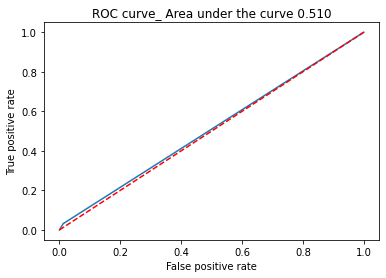

In [288]:
#KNeighbors Classifier - ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

auc_knn= roc_auc_score(Y_test, knn_pred)
fpr, tpr, thresholds= roc_curve(Y_test, knn_pred)
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve_ Area under the curve %0.3f' %auc_knn)
plt.show()

In [289]:
#Decision Tree Classifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

tree_clasiffier=DecisionTreeClassifier(max_depth=3)
tree_clasiffier.fit(X_train, Y_train)
#Creamos os y predictivos
tree_pred=tree_clasiffier.predict(X_test)

In [290]:
#Decision Tree Classifier - Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
#Eiqui enfrentamos os valores de Y predecidos, cos valores de Y reales (test_Y)
tree_rsquared=r2_score(Y_test, tree_pred)
print('The R_Squared of the Tree Classifier is', knn_rsquared)
#Conclusion:
#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) as
#it is hapenning in this case
tree_accuracy=accuracy_score(Y_test,tree_pred)
print('The accuracy of the Tree Classifier neighbors is', tree_accuracy)

tree_f1score=f1_score(Y_test,tree_pred)
print('The F1_Score of the Tree Classifier neighbors is', tree_f1score)

tree_recallscore=recall_score(Y_test,tree_pred)
print('The Recall of the Tree Classifier neighbors is', tree_recallscore)

tree_precision=precision_score(Y_test,tree_pred)
print('The precision of the Tree Classifier neighbors is', tree_precision)

tree_rmse=mean_squared_error(Y_test, tree_pred)
print('The rmse of the Tree Classifier neighbors is', tree_rmse)

The R_Squared of the Tree Classifier is -0.20058676160337563
The accuracy of the Tree Classifier neighbors is 0.9096812278630461
The F1_Score of the Tree Classifier neighbors is 0.07272727272727274
The Recall of the Tree Classifier neighbors is 0.0379746835443038
The precision of the Tree Classifier neighbors is 0.8571428571428571
The rmse of the Tree Classifier neighbors is 0.09031877213695395


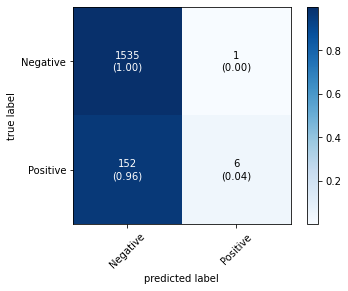

In [291]:
#Decision Tree Classifier - Confussion Matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

confusion_matrix_tree=confusion_matrix(Y_test, tree_pred)

confusion_matrix_tree_table=plot_confusion_matrix(confusion_matrix_tree,
                     colorbar=True,
                    show_absolute=True,
                    show_normed=True,
                    class_names=['Negative', 'Positive'])

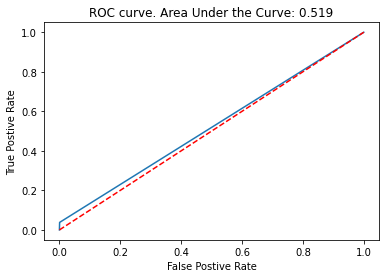

In [292]:
#Decision Tree Classifier - ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
#fpr: False positive rate
#tpr: True positive rate
auc_tree=roc_auc_score(Y_test, tree_pred)
fpr, tpr, thresholds= roc_curve(Y_test, tree_pred )
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Postive Rate')
plt.ylabel ('True Postive Rate')
plt.title('ROC curve. Area Under the Curve: %0.3f' %auc_tree)
plt.show()

In [293]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, Y_train['sars_cov_2_exam_result'])
#Eiqui predicimos os valores de Y
NaiveBayes_pred=NaiveBayes.predict(X_test)
#Eiqui enfrentamos os valores de Y predecidos, cos valores de Y reales (test_Y)

In [294]:
#Naive Bayes - Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
#Eiqui enfrentamos os valores de Y predecidos, cos valores de Y reales (test_Y)
NaiveBayes_rsquared=r2_score(Y_test, NaiveBayes_pred)
print('The R_Squared of the NaiveBayes is', NaiveBayes_rsquared)
#Conclusion:
#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) as
#it is hapenning in this case
NaiveBayes_accuracy=accuracy_score(Y_test,NaiveBayes_pred)
print('The accuracy of the NaiveBayes is', NaiveBayes_accuracy)

NaiveBayes_f1score=f1_score(Y_test,NaiveBayes_pred)
print('The F1_Score of the NaiveBayes is', NaiveBayes_f1score)

NaiveBayes_recallscore=recall_score(Y_test,NaiveBayes_pred)
print('The Recall of the NaiveBayes is', NaiveBayes_recallscore)

NaiveBayes_precision=precision_score(Y_test,NaiveBayes_pred)
print('The precision of the NaiveBayes is', NaiveBayes_precision)

NaiveBayes_rmse=mean_squared_error(Y_test, NaiveBayes_pred)
print('The rmse of the NaiveBayes is', NaiveBayes_rmse)

The R_Squared of the NaiveBayes is -0.2634081619198314
The accuracy of the NaiveBayes is 0.8931523022432113
The F1_Score of the NaiveBayes is 0.15813953488372093
The Recall of the NaiveBayes is 0.10759493670886076
The precision of the NaiveBayes is 0.2982456140350877
The rmse of the NaiveBayes is 0.10684769775678866


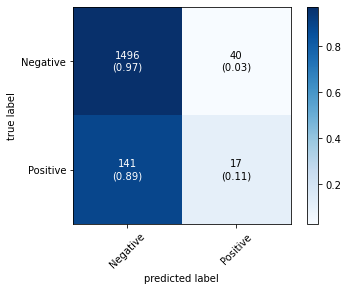

In [295]:
#Naive Bayes - Confussion Matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

confusion_matrix_NaiveBayes= confusion_matrix(Y_test, NaiveBayes_pred)
confusion_matrix_NaiveBayes_table= plot_confusion_matrix(confusion_matrix_NaiveBayes,
                                                   colorbar=True,
                                                   show_absolute= True,
                                                   show_normed= True,
                                                  class_names=['Negative', 'Positive'])

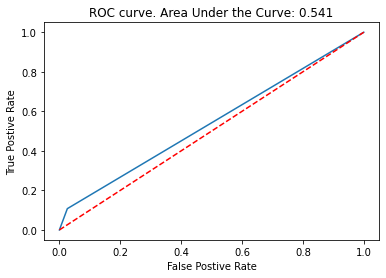

In [296]:
#Naive Bayes - ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
#fpr: False positive rate
#tpr: True positive rate
auc_NaiveBayes=roc_auc_score(Y_test, NaiveBayes_pred)
fpr, tpr, thresholds= roc_curve(Y_test, NaiveBayes_pred)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Postive Rate')
plt.ylabel ('True Postive Rate')
plt.title('ROC curve. Area Under the Curve: %0.3f' %auc_NaiveBayes)
plt.show()

In [297]:
from sklearn.neural_network import MLPClassifier

MLP_Classifier = MLPClassifier(activation='logistic')
MLP_Classifier.fit(X_train, Y_train)
MLP_Classifier_pred=MLP_Classifier.predict(X_test)
MLP_Classifier_accu= accuracy_score(Y_test, MLP_Classifier_pred)

C:\Users\falvarez\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\falvarez\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [298]:
#SupportVectorClassifier - Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
#Eiqui enfrentamos os valores de Y predecidos, cos valores de Y reales (test_Y)
MLP_Classifier_rsquared=r2_score(Y_test, MLP_Classifier_pred)
print('The R_Squared of the MLP_Classifier is', MLP_Classifier_rsquared)
#Conclusion:
#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) as
#it is hapenning in this case
MLP_Classifier_accuracy=accuracy_score(Y_test,MLP_Classifier_pred)
print('The accuracy of the MLP_Classifier is', MLP_Classifier_accuracy)

MLP_Classifier_f1score=f1_score(Y_test,MLP_Classifier_pred)
print('The F1_Score of the MLP_Classifier is', MLP_Classifier_f1score)

MLP_Classifier_recallscore=recall_score(Y_test,MLP_Classifier_pred)
print('The Recall of the MLP_Classifier is', MLP_Classifier_recallscore)

MLP_Classifier_precision=precision_score(Y_test,MLP_Classifier_pred)
print('The precision of the MLP_Classifier is', MLP_Classifier_precision)

MLP_Classifier_rmse=mean_squared_error(Y_test, MLP_Classifier_pred)
print('The rmse of the MLP_Classifier is', MLP_Classifier_rmse)

The R_Squared of the MLP_Classifier is -0.040043183016877704
The accuracy of the MLP_Classifier is 0.9120425029515938
The F1_Score of the MLP_Classifier is 0.13872832369942198
The Recall of the MLP_Classifier is 0.0759493670886076
The precision of the MLP_Classifier is 0.8
The rmse of the MLP_Classifier is 0.08795749704840614


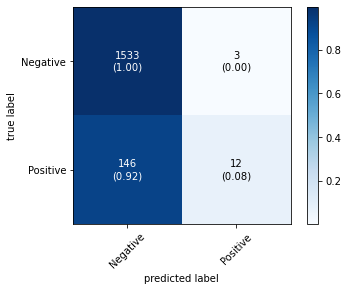

In [299]:
#Support Vector Machine - Confussion Matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

confusion_matrix_SVC= confusion_matrix(Y_test, MLP_Classifier_pred)
confusion_matrix_SVC_table= plot_confusion_matrix(confusion_matrix_SVC,
                                                   colorbar=True,
                                                   show_absolute= True,
                                                   show_normed= True,
                                                  class_names=['Negative', 'Positive'])

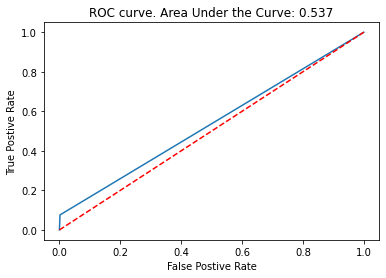

In [300]:
#Support Vector Machine - ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
#fpr: False positive rate
#tpr: True positive rate
auc_SVC=roc_auc_score(Y_test, MLP_Classifier_pred)
fpr, tpr, thresholds= roc_curve(Y_test, MLP_Classifier_pred)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Postive Rate')
plt.ylabel ('True Postive Rate')
plt.title('ROC curve. Area Under the Curve: %0.3f' %auc_SVC)
plt.show()

#### This is where I set you free! You have the basic tools in hand to build an ML model for this dataset. Go forth and explore! Build the best ML model you can. You are open to try anything you want. But wait what should you turn in for my points? We want you to provide a document with the following information. Answer the questions. Note: the answers might also help you improve your model. 

#### 1. Is the traget variable balanced or unbalanced? 
#### 2. Share one of the feature distributions you found? Add the image and describe what type of distribution it is.
#### 3. What is the relationship between hematocrit and hemoglobin?
#### 4. What is the standard deviation of patient_age_quantile?
#### 5. Run at least 4 machine learning models and create a chart comparing them with the information below. A seperate table should be made for train, validation, and test. Note: each requirement listed is a column for your table.
#### Name of Model - example: random forest
#### R-Squared - value for the model
#### Accuracy - value for the model
#### F1-Score - value for the model
#### Recall - value for the model
#### Percision - value for the model
#### RMSE - value for the model
#### 6. Based on the chart you created in 5 which is the best model and why? 

## Answers

#### 1. Is the traget variable balanced or unbalanced?

([<matplotlib.axis.XTick at 0x20154b9adc8>,
 [Text(0, 0, 'Negative_Result'), Text(0, 0, 'Positive,_Result')])

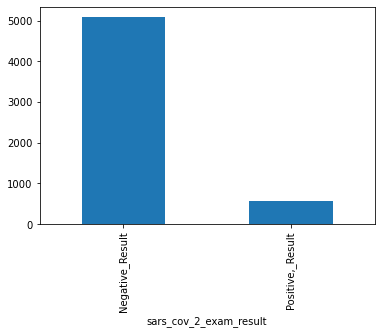

In [301]:
x=covid_dataframe.groupby(by='sars_cov_2_exam_result').count()['patient_id']
x.plot.bar()
plt.xticks(np.arange(2), ('Negative_Result', 'Positive,_Result'))
#As we can see in the below chart, the target variable is quite Imbalanced, as most of the data is
#related to patients who were identified with a negative result in the COVID proof.

#### 2. Share one of the feature distributions you found? Add the image and describe what type of distribution it is.

(array([568., 566., 660., 600., 526., 570., 510., 568., 542., 534.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

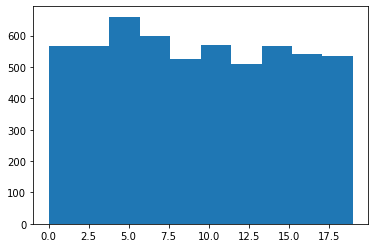

In [302]:
plt.hist(covid_dataframe['patient_age_quantile'])
#The 'patient_age_quantile' follows a Uniform Distribution, where the probabilities of getting these
#outcomes are equally likely.

#### 3. What is the relationship between hematocrit and hemoglobin?

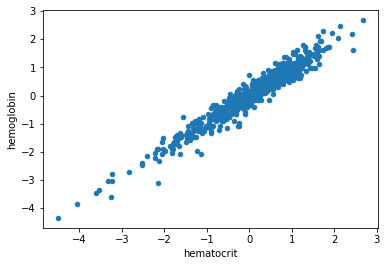

In [303]:
covid_dataframe.plot.scatter(x='hematocrit', y='hemoglobin')

In [304]:
from scipy.stats import pearsonr
pearsonr(covid_dataframe['hematocrit'], covid_dataframe['hemoglobin'])
#We can see that the two variables are positively correlated and that the correlation is 0.96.
#This is a linear correlation where when one of the variables increases, the other also does.
#Therefore, it would be ok to mantain just one of the variables in the dataset, as if both of them are
#mantanined, we will be suffering multicollinearity.

(0.9684465668095571, 0.0)

### 4. What is the standard deviation of patient_age_quantile?

In [305]:
np.std(covid_dataframe['patient_age_quantile'])

5.77739140235911

### 5. Run at least 4 machine learning models and create a chart comparing them with the information below. A seperate table should be made for train, validation, and test. Note: each requirement listed is a column for your table.
#### Name of Model - example: random forest
#### R-Squared - value for the model
#### Accuracy - value for the model
#### F1-Score - value for the model
#### Recall - value for the model
#### Percision - value for the model
#### RMSE - value for the model

In [308]:
metrics={'Name of Model':['knn','DecisionTreeClassifier','Naive Bayes','MLP_Classifier'],
        'R_Squared':[knn_rsquared,tree_rsquared,NaiveBayes_rsquared,MLP_Classifier_rsquared],
        'Accuracy':[knn_accuracy,tree_accuracy,NaiveBayes_accuracy,MLP_Classifier_accuracy],
        'F1_Score':[knn_f1score,tree_f1score,NaiveBayes_f1score,MLP_Classifier_f1score],
        'Recall':[knn_recallscore,tree_recallscore,NaiveBayes_recallscore,MLP_Classifier_recallscore],
        'Precision':[knn_precision,tree_precision,NaiveBayes_precision,MLP_Classifier_precision],
        'RMSE':[knn_rmse,tree_rmse,NaiveBayes_rmse,MLP_Classifier_rmse]}
metrics_df=pd.DataFrame(metrics, columns=['Name of Model', 'R_Squared', 'Accuracy', 'F1_Score',
                                         'Recall','Precision','RMSE'])
metrics_df=metrics_df.set_index('Name of Model')
metrics_df

,R_Squared,Accuracy,F1_Score,Recall,Precision,RMSE
Name of Model,,,,,,
knn,-0.200587,0.898465,0.054945,0.031646,0.208333,0.101535
DecisionTreeClassifier,-0.067964,0.909681,0.072727,0.037975,0.857143,0.090319
Naive Bayes,-0.263408,0.893152,0.158140,0.107595,0.298246,0.106848
MLP_Classifier,-0.040043,0.912043,0.138728,0.075949,0.800000,0.087957


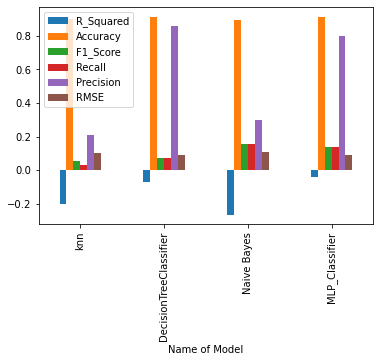

In [307]:
metrics_df.plot.bar()
#plt.xticks(np.arange(2), ('Negative_Result', 'Positive,_Result'))

### 6. Based on the chart you created in 5 which is the best model and why?

A deeper data treatment should have been done in this project,as it is handling the outliers, or look for multicollinearity in the features. However, due to the lack of time, these steps were skipped.<br>
Regarding the model that I chose to predict future cases of COVID, is: MLP_Classifier as it is the one which is performing better. Let's take a look at the metrics:<br>
-R_Squared: -0.040043. This metric tell us how well the model fits the observations and it is able to  show the proportion of variance explained by the fit. In this case, the value is almost 0, so the model does not fit the observation. This may happen as the equation does not contain a constant term and the fit is actually wosrse than just fitting a horizontal line. However it is the model with the R_squared metric closest to 0.<br>
-Accuracy: 0.912043. It is one of the highest values and it says  how much we predict correctly. However, as most of the data target is Negative (unbalanced data), it is easy to have a good score in this metric. Think that if we predict all the predictions as Negative Values, we will be matching correctly most of the cases becauase most of the data is Negative.<br>
-F1_Score: 0.138728. This score is like a balance between Precision and Recall and it is not a good score<br>
-Recall: 0.075949. It calculates how many of the Actual Positives our model capture through labeling it is Positive (True Positive). This is one of the most important metrics for our data, and it is a bad score. The model is not capturing well the people who has really COVID. I mean, it is good at predicting that if the patient has not COVID, probably, they will not have COVID, but it is a really bad model as for those people who have really COVID, probably the model will say that they will not have COVID. <br>
-Precision: 0.800000. This is a really good score. It tell us how precise/accurate our model is out of those predicted positive, how many of them are actual positive. So, the model is really good at predicting the True Positives. I mean, if the model says that the patient has not COVID, there is a high probability that the patient has not COVID.<br>
-RMSE: 0.087957. It is the standard deviation of the prediction errors. It is a bad value as it is far from 1<br>

**CONCLUSION**: I am not happy with any model that I have created, as the overall metrics are not good. If we take a look at the ROC curves, the AUC is 0.5. This is the same as flipping a coin into the air and if it is head, the patien has COVID and if it is cross, the patien has not COVID.